# Exploring Text Data
### Table of Contents
1. About the Dataset
2. Tokenization
3. Lemazitaion
4. Generating Word Frequency
5. EDA using Word Clouds
6. Text Cleaning

## 1. About the Dataset

In [4]:
#!python -m spacy download en_core_web_sm
#import en_core_web_sm
#tok = en_core_web_sm.load()
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 39.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [6]:
import os
import pandas as pd
!git clone https://github.com/sros-UNED/NLPforHumanist.git
path='/content/NLPforHumanist/moby_dick/'

fatal: destination path 'NLPforHumanist' already exists and is not an empty directory.


In [ ]:
#!unzip dataset.zip

In [7]:
# Getting list of all files in the folder
file_names=os.listdir(path='/content/NLPforHumanist/moby_dick/')

In [8]:
len(file_names)

3

In [9]:
file_names[:3]

['moby_chp1.txt', 'moby_chp2.txt', 'moby_chp3.txt']

In [10]:
files=[]

# Filling the list with text data from all the files
for file_name in file_names:
    file=open(path+file_name,mode='r',encoding='utf-8')
    text=file.read()
    file.close()
    
    # Appending data to the list
    files.append(text)

In [11]:
# Creating dataframe from the list
df=pd.DataFrame(files,columns=['text'])

In [12]:
# Printing shape of dataframe
print('Shape=>',df.shape)

Shape=> (3, 1)


In [13]:
# Printing first three rows
df.head()
#print(df['text'][1])
#len(df['text'][1]) #Letters
#print(len(df['text'][1][:5]))

,text
0,CHAPTER 1\n\nLoomings.\n\n\nCall me Ishmael. ...
1,CHAPTER 2\n\nThe Carpet-Bag.\n\n\nI stuffed a ...
2,CHAPTER 3\n\nThe Spouter-Inn.\n\n\nEntering th...


In [ ]:
#Saving information
df.to_csv('drive/My Drive/Colab Notebooks/Reading Text data/moby_dick/dataframe.csv',index=False)

#2. TOKENIZATION IN SPACY


In [14]:
# Defining string
text= "I'm working as a Data Scientist in the U.S. and earning $140,000."

In [15]:
# Whitespace Tokenizer
print(text.split())

["I'm", 'working', 'as', 'a', 'Data', 'Scientist', 'in', 'the', 'U.S.', 'and', 'earning', '$140,000.']


In [16]:
import spacy

Models in spaCy for English Language as of release 2.3.1:
- **en_core_web_sm:** 11MB
- **en_core_web_md:** 48MB
- **en_core_web_lg:** 746MB

In [17]:
# Loading model
nlp=spacy.load('en_core_web_sm')

In [18]:
# creating Doc object
doc=nlp(text)

In [19]:
doc

I'm working as a Data Scientist in the U.S. and earning $140,000.

In [20]:
type(doc)

spacy.tokens.doc.Doc

In [21]:
# spaCy Tokenizer
print([token for token in doc])

[I, 'm, working, as, a, Data, Scientist, in, the, U.S., and, earning, $, 140,000, .]


In [22]:
# Type of token
[type(token) for token in doc]

[spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token,
 spacy.tokens.token.Token]

In [23]:
# Tokens as string
print([token.text for token in doc])

['I', "'m", 'working', 'as', 'a', 'Data', 'Scientist', 'in', 'the', 'U.S.', 'and', 'earning', '$', '140,000', '.']


In [24]:
# Comparing Whitespace and spaCy Tokenizer

# Whitespace Tokenizer
print(text.split())

# spaCy Tokenizer
print([token.text for token in doc])

["I'm", 'working', 'as', 'a', 'Data', 'Scientist', 'in', 'the', 'U.S.', 'and', 'earning', '$140,000.']
['I', "'m", 'working', 'as', 'a', 'Data', 'Scientist', 'in', 'the', 'U.S.', 'and', 'earning', '$', '140,000', '.']


In [25]:
# No. of Tokens in Whitespace Tokenizer
print(len(text.split()))

# No. of Tokens in spaCy's Tokenizer
print(len(doc))

12
15


In [26]:
text="My phone has a 20% battery left."

# Whitespace Tokenizer
print(text.split())

# spaCy Tokenizer
print([token.text for token in nlp(text)])

['My', 'phone', 'has', 'a', '20%', 'battery', 'left.']
['My', 'phone', 'has', 'a', '20', '%', 'battery', 'left', '.']


In [27]:
text="I ran 10km today."

# Whitespace Tokenizer
print(text.split())

# spaCy Tokenizer
print([token.text for token in nlp(text)])

['I', 'ran', '10km', 'today.']
['I', 'ran', '10', 'km', 'today', '.']


In [28]:
text="I know HTML, CSS, JavaScript, C++, and Node.js."

# Whitespace Tokenizer
print(text.split())

# spaCy Tokenizer
print([token.text for token in nlp(text)])

['I', 'know', 'HTML,', 'CSS,', 'JavaScript,', 'C++,', 'and', 'Node.js.']
['I', 'know', 'HTML', ',', 'CSS', ',', 'JavaScript', ',', 'C++', ',', 'and', 'Node.js', '.']


#3.- Lemmatization in spaCy

In [34]:
# Defining the string
text="The sky is clear and the stars are twinkling."
!python -m spacy download es_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 38.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [30]:
import spacy

In [35]:
# Loading spacy model
#nlp=spacy.load('en_core_web_sm')
nlp=spacy.load('es_core_news_sm')

In [36]:
text="El cielo esta claro y las estrellas brillan ."
# Creating doc object
doc=nlp(text)

In [37]:
# Lemmatizing the text
[(token.text,token.lemma_) for token in doc]

[('El', 'el'),
 ('cielo', 'cielo'),
 ('esta', 'este'),
 ('claro', 'claro'),
 ('y', 'y'),
 ('las', 'el'),
 ('estrellas', 'estrella'),
 ('brillan', 'brillar'),
 ('.', '.')]

In [38]:
text="The moon looks beautiful at night. it's hard to resist its beauty."

# Creating doc object
doc=nlp(text)

# Lemmatizing the text
[(token.text,token.lemma_) for token in doc]


[('The', 'The'),
 ('moon', 'moon'),
 ('looks', 'looks'),
 ('beautiful', 'beautiful'),
 ('at', 'at'),
 ('night', 'night'),
 ('.', '.'),
 ("it's", "it's"),
 ('hard', 'hard'),
 ('to', 'to'),
 ('resist', 'resist'),
 ('its', 'its'),
 ('beauty', 'beauty'),
 ('.', '.')]

## 3. Generating Word Frequency for all documents

In [ ]:
import spacy

In [40]:
# Loading model
nlp=spacy.load('en_core_web_sm')
print("Pipeline:", nlp.pipe_names)

Pipeline: ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [41]:
# Combining chapters into a single string
combined_chapters=' '.join(df.text.values)
len(combined_chapters)


52534

In [42]:
# Creating Doc object
doc=nlp(combined_chapters)



In [43]:
# Function for generating word frequency
def gen_freq(tokens):
    
    # Creating a pandas series with word frequencies 
    #see Dataframe.value_counts:Return a Series containing counts of unique rows in the DataFrame.
    word_freq = pd.Series([token.text for token in tokens]).value_counts()
    #Series is like and a vector but inmutable and each element separte by coma
    
    # Printing frequencies: is the number of most frecuents words
    print(word_freq[:10])
  
    
    return word_freq

In [44]:
# Getting word frequency
#See pandas.Series
word_freq=gen_freq(doc)
#accessing serie
word_freq.keys()
word_freq[:3]
word_freq['the']
#word_freq[['Ishmael','ship']]
print(word_freq.size)
print(len(word_freq))

,      785
\n     721
the    496
a      349
.      343
and    295
       284
of     278
I      223
to     205
dtype: int64
2611
2611


## Exercise
Rewrite the function gen_freq to get `max` number of frecuente words


In [ ]:
# Function for generating word frequency
def gen_freq_max(tokens,____):
    
    # Creating a pandas series with word frequencies
    word_freq = pd.Series([token.text for token in tokens]).value_counts()
    #Series is like and a vector but inmutable and each element separte by coma
    
    # Printing frequencies: is the number of most frecuents words
    print(word_freq[:___])
   #word_freq=word_freq[:max]
    return word_freq

max=5
word_freq=gen_freq_max(doc,max)

In [ ]:
print('No. of unique words before cleaning=>',len(word_freq))
type(word_freq)

## 4. EDA using Word Clouds
**Note:-** You can install `WordCloud` library by - 

`pip install wordcloud`

In [45]:
#Importing libraries
!pip install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [46]:
# Function for generating wordcloud
def generate_wordcloud(data):
    # Creating a wordcloud
    wc = WordCloud(width=400, height=330, max_words=100,background_color='white').generate_from_frequencies(data)
    
    # Setting Figure Size
    plt.figure(figsize=(14,12))
    
    # Display wordcloud as image
    plt.imshow(wc, interpolation='bilinear')
    
    # Removing all the axes
    plt.axis("off")
    
    plt.show()

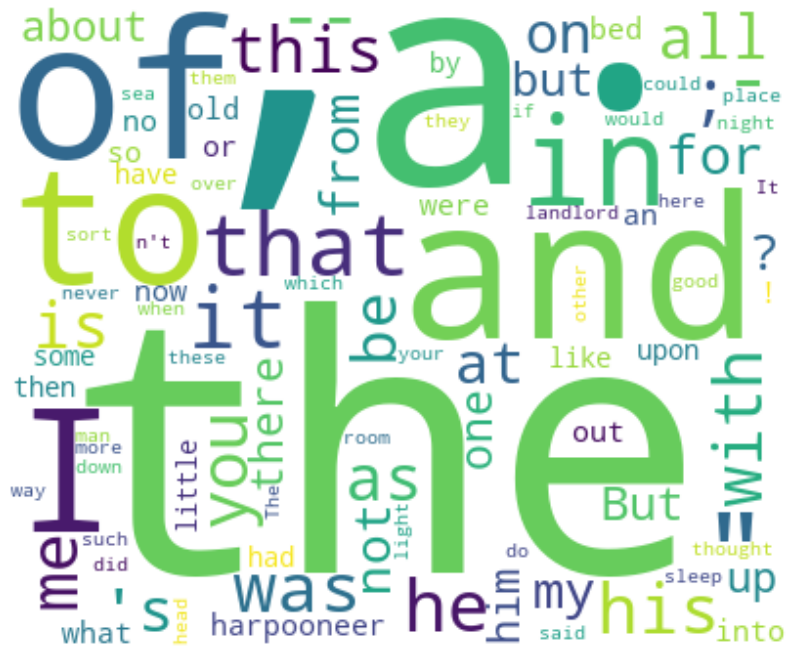

In [47]:
# Generating wordcloud
generate_wordcloud(word_freq)

#plt.savefig('word_cloud.png')

# What is it happening??

## 5. Text Cleaning 

In [48]:
import re

In [49]:
# Cleaning text quotes, quuestion marks, exclamatin marks, period, coma, brakets,semicolon, dash
def clean_text(string1):
    output = string1.strip()
    replacements = (
      ("“", ''), ("”", ''), ("//", ""), ("«", ''), ("»", ''), (",", ''),
      (";", ''), (".", ''),
    )
    for replacement in replacements:
        output = output.replace(*replacement)
    # Any sequence of two or more spaces should be converted into one space
    output = re.sub(r'\t+', ' ', output)
    output = re.sub(r'\n{1,}', '', output)
    output = re.sub(r' {2,}', ' ', output)     
    return output.strip()

In [50]:
text = clean_text(combined_chapters)
# Lowercasing the text
print ("Lenght before cleaning {0} and length after cleaning {1}".format(len(combined_chapters),len(text)))
combined_chapters=text.lower()

Lenght before cleaning 52534 and length after cleaning 50083


In [51]:
# Creating Doc object
doc=nlp(combined_chapters)


# What are Stop words?
Stopwords are the most common words in a language which are added to make things more understandable to humans. Like in English we have `a, an, the, for, where, when, at,` etc. These words are removed during text pre-processing phase because these words do not add much value to the meaning of the document.

Due to stopwords a lot of resources get wasted in storing and pre-processing these. Removing them makes the process of analysis and model building faster because the corpus size gets reduced due to it.

Consider a sample sentence:
##### String: "There is a pen on the table."
##### Stopwords: \["There", "is", "a", "on", "the" \]
##### Meaningful words: \["pen", "table"\]

## Remove Stopwords:
- Text Classification
- Caption Generation
- Auto-Tag Generation

## Don't Remove Stopwords:
- Machine Translation
- Language Modeling
- Text Summarization
- Question-Answering Problems

In [52]:
print(nlp.Defaults.stop_words)

{'own', 'without', 'alone', 'take', 'due', 'whether', 'themselves', '’re', 'two', 'even', 'because', 'others', "'d", 'did', 'together', 'using', 'seem', 'most', 'of', 'ca', 'below', 'until', 'before', 'five', 'otherwise', 'although', 'sometime', 'throughout', 'again', 'could', 'forty', 'above', 'becomes', 'here', 'whenever', 'had', 'nobody', 'therein', 'none', 'one', 'would', 'nevertheless', 'only', 'get', 'what', 'become', 'behind', 'now', 'across', 'under', 'n’t', 'whatever', 'formerly', 'hereby', 'more', 'nine', 'onto', '’d', 'back', 'whereupon', 'ever', '‘re', 'just', 'full', 'to', 'anyway', '‘s', '’m', 'us', 'wherever', 'was', 'must', 'well', 'between', 'first', 'we', 'moreover', 'nothing', 'herself', 'where', 'then', 'unless', 'ourselves', '’ll', 'nor', 'perhaps', 'my', 'very', 'its', 'whole', 'those', 'indeed', 'though', '’s', 'do', 'him', 'as', 'really', 'elsewhere', 'less', 'often', 'whom', 'hereafter', 'third', 'therefore', 'beforehand', '’ve', 'see', 'every', 'almost', 'then

In [53]:
len(nlp.Defaults.stop_words)
#nlp.Defaults.stop_words.add("my_new_stopword")
#nlp.Defaults.stop_words.remove("whatever")
#nlp.Defaults.stop_words |= {"my_new_stopword1","my_new_stopword2",}
#or |= or -=

326

In [54]:
# Removing stopwords and punctuations
new_tokens=[token for token in doc if (token.is_stop==False|token.is_punct==False)]

In [55]:
len(new_tokens)
#print(new_tokens)

4007

In [56]:
# Getting word frequencies
word_freq=gen_freq(new_tokens)

harpooneer    28
old           25
bed           24
like          21
night         21
little        19
sort          18
room          17
said          17
man           17
dtype: int64


In [57]:
print('No. of unique words=>',len(word_freq))

No. of unique words=> 2642


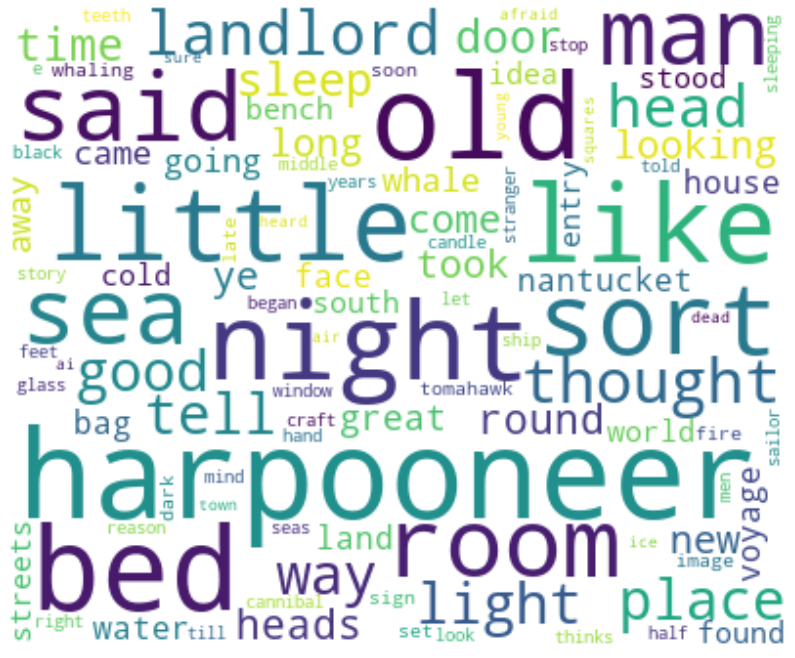

In [58]:
# Generating wordcloud
generate_wordcloud(word_freq)

# Exercise
## Calculate word cloud for each chapter.

In [ ]:
# We have already the three chapters in the Dataframe df
chapt1=__(df['text'][_])
chapt2=__(df['text'][___])
chapt3=__(df['text'][_])
type(chapt1)

In [ ]:
# We can use both word frecuencies since we do not limit the lenght of the variable but only the number of words we print
max=5
# Getting word frequency
word_freq1=______(chapt1,max)
# Getting word frequency
word_freq2=_______(chapt2)
# Getting word frequency
word_freq3=gen_freq_max(_____3)
print('No. of unique words chapter1=>',__(word_freq1))
print('No. of unique words chapter2=>',__(word_freq2))
print('No. of unique words chapter3=>',__(word_freq3))

In [ ]:
generate_wordcloud(word_freq1)

In [ ]:
generate_wordcloud(word_freq2)

In [ ]:
generate_wordcloud(word_freq3)

In [ ]:
#Lenght
print("length chapter 1 {}".format(len(chapt1)))
print("length chapter 2 {}".format(len(chapt2)))
print("length chapter 3 {}".format(len(chapt3)))

In [ ]:
chapt1[0].tag_

In [ ]:
for token in chapt1:
    print(token.text, token.pos_, token.dep_)

In [ ]:
# We have already the three chapters in the Dataframe df
chapt1=nlp(df['text'][0])
chapt2=nlp(df['text'][1])
chapt3=nlp(df['text'][2])
type(chapt1)

#SOLUTION

In [ ]:
# We can use both word frecuencies since we do not limit the lenght of the variable but only the number of words we print
max=5
# Getting word frequency
word_freq1=gen_freq_max(chapt1,max)
# Getting word frequency
word_freq2=gen_freq_max(chapt2)
# Getting word frequency
word_freq3=gen_freq_max-(chapt3)
print('No. of unique words chapter1=>',len(word_freq1))
print('No. of unique words chapter2=>',len(word_freq2))
print('No. of unique words chapter3=>',len(word_freq3))

In [ ]:
generate_wordcloud(word_freq1)

In [ ]:
generate_wordcloud(word_freq2)

In [ ]:
generate_wordcloud(word_freq3)

In [ ]:
#Lenght
print("length chapter 1 {}".format(len(chapt1)))
print("length chapter 2 {}".format(len(chapt2)))
print("length chapter 3 {}".format(len(chapt3)))

In [ ]:
chapt1[0].tag_

In [ ]:
for token in chapt1:
    print(token.text, token.pos_, token.dep_)

# EXERCISE
In this exercise, you’ll create the Doc and Span objects manually, and update the named entities – just like spaCy does behind the scenes. A shared nlp object has already been created.

Import the Doc and Span classes from spacy.tokens.
Use the Doc class directly to create a doc from the words and spaces.
Create a Span for “David Bowie” from the doc and assign it the label "PERSON".
Overwrite the doc.ents with a list of one entity, the “David Bowie” span.

In [ ]:

# Import the Doc and Span classes
from spacy.____ import ____, ____

words = ["I", "like", "David", "Bowie"]
spaces = [True, True, True, False]

# Create a doc from the words and spaces
doc = ____(____, ____, ____)
print(doc.text)

# Create a span for "David Bowie" from the doc and assign it the label "PERSON"
span = ____(____, ____, ____, label=____)
print(span.text, span.label_)

# Add the span to the doc's entities
____.____ = [____]

# Print entities' text and labels
print([(ent.text, ent.label_) for ent in doc.ents])

#Solution

In [ ]:

# Import the Doc and Span classes
from spacy.tokens import Doc, Span

words = ["I", "like", "David", "Bowie"]
spaces = [True, True, True, False]

# Create a doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

# Create a span for "David Bowie" from the doc and assign it the label "PERSON"
span = Span(doc, 2, 4, label="PERSON")
print(span.text, span.label_)

# Add the span to the doc's entities
doc.ents = [span]

# Print entities' text and labels
print([(ent.text, ent.label_) for ent in doc.ents])

# #Look for a NOUN AFTER A VERB

In [59]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp("Berlin looks like a nice city")

# Iterate over the tokens
for token in doc:
    # Check if the current token is a proper noun
    if token.pos_ == "PROPN":
        # Check if the next token is a verb
        if doc[token.i + 1].pos_ == "VERB":
            print("Found proper noun before a verb:", token.text)

Found proper noun before a verb: Berlin


In [62]:
nlp=spacy.load('en_core_web_sm')
print("Pipeline:", nlp.pipe_names)


Pipeline: ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [64]:

!python -m spacy download en_core_web_md
nlp = spacy.load("en_core_web_md")
print("Pipeline:", nlp.pipe_names)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 MB 12.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
Pipeline: ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']


In [65]:
import spacy


doc1 = nlp("It's a warm summer day")
doc2 = nlp("It's sunny outside")

# Get the similarity of doc1 and doc2
similarity = doc1.similarity(doc2)
print(similarity)

0.8789265574516525


#AÑADIENDO UNA NUEVA ETAPA EN EL PIPE LINE

In [79]:
import spacy
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span
from spacy.language import Language
nlp = spacy.load("en_core_web_sm")

# Define el componente personalizado
@Language.component("animal_component")

# Define the custom component
def animal_component_func(doc):
    # Apply the matcher to the doc
    matches = matcher(doc)
    # Create a Span for each match and assign the label "ANIMAL"
    spans = [Span(doc, start, end, label="ANIMAL") for match_id, start, end in matches]
    # Overwrite the doc.ents with the matched spans
    doc.ents= spans
    return doc
# Add the component to the pipeline after the "ner" component
nlp.add_pipe('animal_component',after='ner')
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner', 'animal_component']


In [80]:

animals = ["Golden Retriever", "cat", "turtle", "Rattus norvegicus"]
animal_patterns = list(nlp.pipe(animals))
print("animal_patterns:", animal_patterns)
matcher = PhraseMatcher(nlp.vocab)
matcher.add("ANIMAL", None, *animal_patterns)


# Process the text and print the text and label for the doc.ents
doc = nlp("I have a cat and a Golden Retriever")
print([(ent.text, ent.label_) for ent in doc.ents])

animal_patterns: [Golden Retriever, cat, turtle, Rattus norvegicus]
[('cat', 'ANIMAL'), ('Golden Retriever', 'ANIMAL')]


SyntaxError: ignored